In [1]:
# import stuff

from rdkit import Chem
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# load csv file of all binding energies, containing all elemental binding energy for surfaces

df = pd.read_csv('dft_binding_energies.csv')

# also save a df of only pure metal ones, which have 12 in the index
df_pure = df.loc[df['chemicalComposition'].str.contains('12', case=False)]



In [3]:
# test molecule: acetylacetone

smiles = "CC(=O)CC(C)=O"

m = Chem.MolFromSmiles(smiles)

In [4]:
for atom in m.GetAtoms():
    print(atom.GetAtomicNum())

6
6
8
6
6
6
8


In [31]:
# simple count of different hetero atoms in a given molecule
# array keeps track of number of C, N, O, S atoms in a molecule

elements = {'C': 0, 'N': 0, 'O': 0, 'S': 0}

for atom in m.GetAtoms():
    if atom.GetAtomicNum() == 6:
        elements['C'] += 1
    elif atom.GetAtomicNum() == 7:
        elements['N'] += 1
    elif atom.GetAtomicNum() == 8:
        elements['O'] += 1
    elif atom.GetAtomicNum() == 16:
        elements['S'] += 1
print(elements)

{'C': 0, 'N': 0, 'O': 0, 'S': 0}


In [6]:
def naive_scaling(atom='C', multiplicity=1, saturation=1):
    # atom: atom identity for scaling
    # multiplicity: number of atoms bound to surface
    # saturation: degree of saturation of the atom bound to surface. Number of bonds the atom can form to surface. Things that increase this is
    # number of double bonds and bonds to hydrogen.

    if atom == 'C':
        valency = 4
    elif atom == 'N':
        valency = 3
    elif atom == 'O':
        valency = 2
    elif atom == 'S':
        valency = 2
    
    slope = saturation * multiplicity / valency
    

    return slope

In [7]:
# check each surface to see which elemental binding energy is most favorable, given the elements present
# in the molecule in question.

# based on number of oxygen atoms, scaling is different

# scaling for single oxygen atom: 1/2

slope = naive_scaling(atom='O')



In [8]:
# array of element labels for plot annotation purposes
dfarray = df_pure.to_numpy()
elementnames = dfarray[:,0]


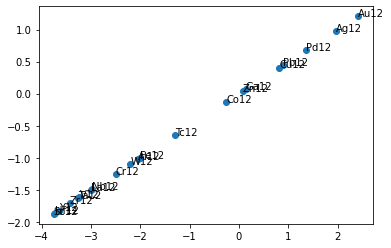

In [9]:

# visualize data by plotting 2d column slices of all compositions

x = df_pure['obind'].to_numpy()
y = x*slope


fig, ax = plt.subplots()
ax.scatter(x,y)

for i, txt in enumerate(elementnames):


    ax.annotate(txt, (x[i], y[i]))


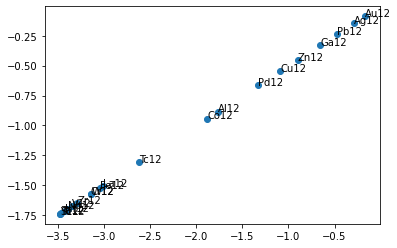

In [10]:
# visualize data by plotting 2d column slices of all compositions

x = df_pure['sbind'].to_numpy()
y = x*slope


fig, ax = plt.subplots()
ax.scatter(x,y)

for i, txt in enumerate(elementnames):


    ax.annotate(txt, (x[i], y[i]))

In [10]:
# given a molecule, find possible atoms that can bind to surface
# find 3d convex hull, then find most atoms that line on a surface that can bind to surface.

#from scipy import spatial

#hull = spatial.ConvexHull()

In [9]:
# import reaxys molecule search into pd df

moledf = pd.read_excel('Reaxys_Exp_20220418_180416.xlsx')
moledf = moledf.drop_duplicates(subset='Substance Identification: Reaxys Registry Number')
moledf = moledf.dropna(subset=['SMILES'])

moledf = moledf.drop_duplicates(subset='SMILES')
moledf = moledf.reset_index(drop=True)

C:\Users\j\miniconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [42]:
moledf = moledf.drop_duplicates(subset='Substance Identification: Reaxys Registry Number')

In [43]:
moledf = moledf.dropna(subset=['SMILES'])
moledf = moledf.reset_index(drop=True)


In [40]:
moledf.drop([0], inplace=True)
moledf

,Structure: Image,SMILES,Substance Identification: Reaxys Registry Number,Links to Reaxys,Data Count,CAS Registry Number,Chemical Name,Linear Structure Formula,Molecular Formula,Molecular Weight,...,Number of Reactions,Number of References,Melting Point: Melting Point [C],Solvent (Melting Point),Location,Comment (Melting Point),Crystallizes With,Amount (Melting Point) [mol],References,Links to Reaxys.1
1,NaN,[H][H],3587189.0,https://www.reaxys.com/reaxys/secured/hopinto....,(2 of 4000),1333-74-0,hydrogen; parahydrogen,H2,H2,2.01588,...,18017.0,44960.0,100.74,NaN,NaN,7.98 GPa,NaN,NaN,"Article; Datchi, Frederic; Loubeyre, Paul; LeT...",https://www.reaxys.com/reaxys/secured/hopinto....
2,NaN,[He],10773680.0,https://www.reaxys.com/reaxys/secured/hopinto....,(3 of 4000),NaN,helium-3; helium,(3)He,He,3.00000,...,21.0,1209.0,NaN,NaN,NaN,melting diagram; melting point table; melting ...,NaN,NaN,"Article; Greywall, Dennis S.; Physical Review ...",https://www.reaxys.com/reaxys/secured/hopinto....
3,NaN,[He],15963689.0,https://www.reaxys.com/reaxys/secured/hopinto....,(4 of 4000),NaN,"helium; helium (3)He, body centered cubic",(3)He,He,3.00000,...,NaN,15.0,-272.2,NaN,NaN,28960 Torr,NaN,NaN,"Article; Iwasa, Izumi; Suzuki, Hideji; Journal...",https://www.reaxys.com/reaxys/secured/hopinto....
4,NaN,[2H],6495792.0,https://www.reaxys.com/reaxys/secured/hopinto....,(5 of 4000),NaN,deuterium hydride; hydrogen deuteride,DH,H2,3.00794,...,598.0,956.0,-256.544,NaN,NaN,NaN,NaN,NaN,"Article; Zeppenfeld, P.; Bienfait, M.; Liu, Fe...",https://www.reaxys.com/reaxys/secured/hopinto....
5,NaN,[2H][2H],6496006.0,https://www.reaxys.com/reaxys/secured/hopinto....,(6 of 4000),16873-17-9,deuterium; dideuterium; deuterium gas; D2,((2)H)2,H2,4.00000,...,3061.0,19334.0,-117.15,NaN,NaN,1.2751E+07 Torr,NaN,NaN,"Article; Diatschenko, V.; Chu, C. W.; Liebenbe...",https://www.reaxys.com/reaxys/secured/hopinto....
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3989,NaN,NCC\C(N)=N/O,6588669.0,https://www.reaxys.com/reaxys/secured/hopinto....,(3996 of 4000),16750-43-9,3-Amino-propanamidoxim,C3H9N3O,C3H9N3O,103.12400,...,7.0,1.0,119 - 120,NaN,NaN,NaN,NaN,NaN,"Article; Goncalves,H.; Mathis,F.; Comptes Rend...",https://www.reaxys.com/reaxys/secured/hopinto....
3990,NaN,[2H]OC(=O)C(C)(C)C,1754752.0,https://www.reaxys.com/reaxys/secured/hopinto....,(3997 of 4000),NaN,pivOD,C5H9DO2,C5H10O2,103.12500,...,4.0,16.0,36.75,NaN,NaN,Method: subl. sample,NaN,NaN,"Article; Kimtys, L.; Balevicius, V.; Aksnes, D...",https://www.reaxys.com/reaxys/secured/hopinto....
3991,NaN,[2H]C(CCC)C(O)=O,2428599.0,https://www.reaxys.com/reaxys/secured/hopinto....,(3998 of 4000),67402-25-9,α-d1-pentanoic acid; <2-2H>-Pentansaeure; 2-de...,C5H9DO2,C5H10O2,103.12500,...,3.0,2.0,187 - 189,NaN,NaN,NaN,NaN,NaN,Article; Okamoto et al.; Journal of the Chemic...,https://www.reaxys.com/reaxys/secured/hopinto....
3992,NaN,[H]N=N#N.CNNC,8774026.0,https://www.reaxys.com/reaxys/secured/hopinto....,(3999 of 4000),NaN,"N,N'-dimethylhydrazinium azide",C2H8N2*HN3,C2H8N2*HN3,103.12700,...,NaN,1.0,-8,NaN,NaN,NaN,NaN,NaN,"Article; Hammerl, Anton; Holl, Gerhard; Hueble...",https://www.reaxys.com/reaxys/secured/hopinto....


In [4]:
# generate columns for this database

# generate the number of heteroatoms in the molecule, only keeping N, O, S elements
# generate the saturation of the bond at the heteroatom
# generate the 0th order scaling slope estimation
# generate an estimated molecule size for sterics
# keep the melting point
# keep the molecular weight


def getatoms(m):
    elements = {'C': 0, 'N': 0, 'O': 0, 'S': 0}
    hetero = False
    for atom in m.GetAtoms():
        if atom.GetAtomicNum() == 6:
            elements['C'] += 1
            hetero = True
        elif atom.GetAtomicNum() == 7:
            elements['N'] += 1
            hetero = True
        elif atom.GetAtomicNum() == 8:
            elements['O'] += 1
            hetero = True
        elif atom.GetAtomicNum() == 16:
            elements['S'] += 1
            hetero = True

    return hetero

In [10]:
# from smiles identifier, remove all molecules that do not contain either C, N, O, or S.

for i in range(len(moledf)):
    m = Chem.MolFromSmiles(moledf['SMILES'][i])
    #print(moledf['SMILES'][i])
    if m is None:
        moledf.drop([i], inplace=True)
        continue
    h = getatoms(m)
    
    if not h:
        moledf.drop([i], inplace=True)
#print(moledf)

In [11]:
# export this refined list of only C, N, O, S containing molecules to new csv
moledf.to_csv('cleanedmolecules.csv', index=False)

In [13]:
print(moledf.columns)

Index(['Structure: Image', 'SMILES',
       'Substance Identification: Reaxys Registry Number', 'Links to Reaxys',
       'Data Count', 'CAS Registry Number', 'Chemical Name',
       'Linear Structure Formula', 'Molecular Formula', 'Molecular Weight',
       'Type of Substance', 'Type and Modification', 'InChI Key',
       'Composition: Comp. Name', 'Composition: Comp. Conc.',
       'Composition: Comp. Attrib.', 'Field Availability',
       'Number of Reactions', 'Number of References',
       'Melting Point: Melting Point [C]', 'Solvent (Melting Point)',
       'Location', 'Comment (Melting Point)', 'Crystallizes With',
       'Amount (Melting Point) [mol]', 'References', 'Links to Reaxys.1'],
      dtype='object')


In [2]:
# import cleaned list of molecules to new df

df1 = pd.read_csv('cleanedmolecules.csv')


In [10]:
df2 = df1[['SMILES', 'Chemical Name', 'Molecular Formula', 'Molecular Weight',  'Melting Point: Melting Point [C]']]
df2.to_csv('cleanedmolecules2.csv', index=False)

In [ ]:


# 
#  convert all molecules in df2 to molecule object of rdkit
df2['Mol'] = df2['SMILES'].apply(Chem.MolFromSmiles)


In [ ]:

# 
